In [3]:
import math
import os
import cv2

import pandas as pd
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn
import scipy.signal as signal

from time import sleep
from tqdm import tqdm

from utils.video_tools import get_frames
from utils.yolo.MyYOLO import YOLODetector
from detect_region import DetectRegions
from detect_periodic import *

In [4]:
detect_regions=DetectRegions('/home/adminroot/Desktop/Detection/confs/con1.conf')
detect_regions.JudgePointInRegion((1600, 200),detect_regions.polygon_list[0])

-47.38446823453985

# 功能函数

## 获取车流

In [7]:
def getTrafficFlow(video, ycfg = './utils/yolo/yoloconfig.ini', rcfg = '/home/adminroot/Desktop/Detection/confs/temp.conf', save_path = None):

    """
    
    给定视频， yolo配置文件， 区域配置文件，计算指定区域内的车流统计时间序列

    Args:
            video (str): 要计算的视频位置 

    Returns:
            detection [list]: 视频指定区域内的车流时间序列
    """

    yolo = YOLODetector(ycfg)

    detection_regions  = DetectRegions(rcfg)

    detection = []

    for i, img in enumerate(get_frames(video)):

        res = yolo.Infer(img, img_name=str(i)+"res.jpg", save_path = save_path)

        count = 0 
        for obj in res:

            if obj[5] == 1 or 2:# count if id is 1(car) or 2(bus)

                if detection_regions.JudgePointInRegion(((obj[0]+obj[2])/2, (obj[1]+obj[3])/2),detection_regions.polygon_list[0]) > 0:
                    #检测是否在区域内

                    count += 1

        detection.append(count)

    return detection

## 读写车流时序

In [11]:
def ts2csv(ts, n):
    """
    存储时间序列（list）到csv
    """
    name_attribute = ['count']
    writerCSV=pd.DataFrame(columns=name_attribute,data=ts)
    writerCSV.to_csv('./timeseries/ts'+str(n)+'.csv',encoding='utf-8', index=False)

In [12]:
def csv2ts(csv,col):
    """
    读取csv的一个colum到np.array
    """
    df = pd.read_csv(csv)
    arr = df[col].to_numpy

## 傅利叶变换（周期）

In [40]:
def fftTransfer(timeseries, n=10, fmin=0.2):

    yf = abs(fft(timeseries))  # 取绝对值
    yfnormlize = yf / len(timeseries)  # 归一化处理
    yfhalf = yfnormlize[range(int(len(timeseries) / 2))]  # 由于对称性，只取一半区间
    yfhalf = yfhalf * 2   # y 归一化


    xf = np.arange(len(timeseries))  # 频率
    xhalf = xf[range(int(len(timeseries) / 2))]  # 取一半区间

    plt.figure(figsize=(15,10))
    plt.subplot(211)
    x = np.arange(len(timeseries))  # x轴
    plt.plot(x, timeseries)
    plt.title('Original wave')

    plt.subplot(212)
    plt.plot(xhalf, yfhalf, 'r')
    plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')  

    fwbest = yfhalf[signal.argrelextrema(yfhalf, np.greater)]
    xwbest = signal.argrelextrema(yfhalf, np.greater)
    plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
    plt.show(block=False)
    plt.show()

    # xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
    # print('xorder = ', xorder)
    # print(type(xorder))
    # xworder = list()
    # xworder.append(xwbest[x] for x in xorder)  # 返回频率从大到小的极值顺序
    # fworder = list()
    # fworder.append(fwbest[x] for x in xorder)  # 返回幅度

    # if len(fwbest) <= n:
    #     fwbest = fwbest[fwbest >= fmin].copy()
    #     return len(timeseries)/xwbest[0][:len(fwbest)], fwbest    #转化为周期输出
    # else:
    #     fwbest = fwbest[fwbest >= fmin].copy()
    #     print(len(fwbest))
    #     print(xwbest)
    #     return len(timeseries)/xwbest[0][:len(fwbest)], fwbest  # 只返回前n个数   #转化为周期输出

# 测试案例

# 拥堵视频提取车流

## Ts2(左车道微拥堵)

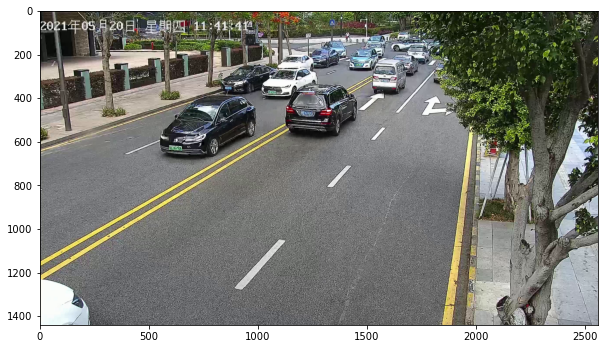

In [5]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con1.1.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [8]:
ts2 = getTrafficFlow("/home/adminroot/Desktop/Detection/videos/test1.1.mp4", rcfg = '/home/adminroot/Desktop/Detection/confs/con1.conf')

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [20]:
ts2csv(ts2, 10)

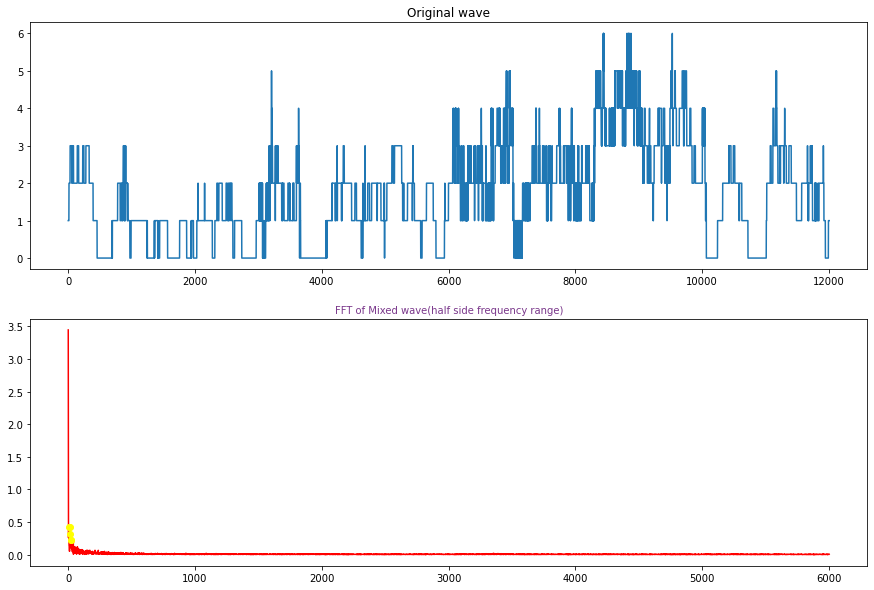

In [21]:
t10 = fftTransfer(ts2)

## Ts3(左车道缓行)

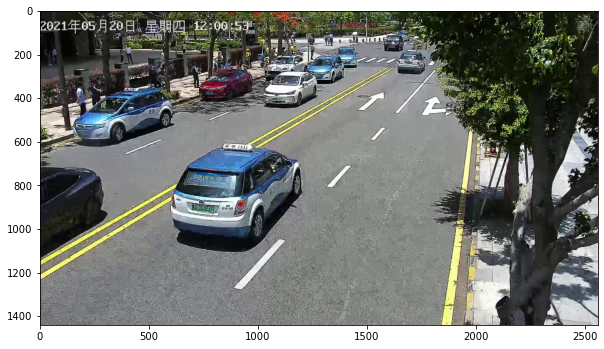

In [15]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con1.2.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [16]:
ts3 = getTrafficFlow("/home/adminroot/Desktop/Detection/videos/test1.2.mp4", rcfg = '/home/adminroot/Desktop/Detection/confs/con1.conf')

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [18]:
ts2csv(ts3, 11)

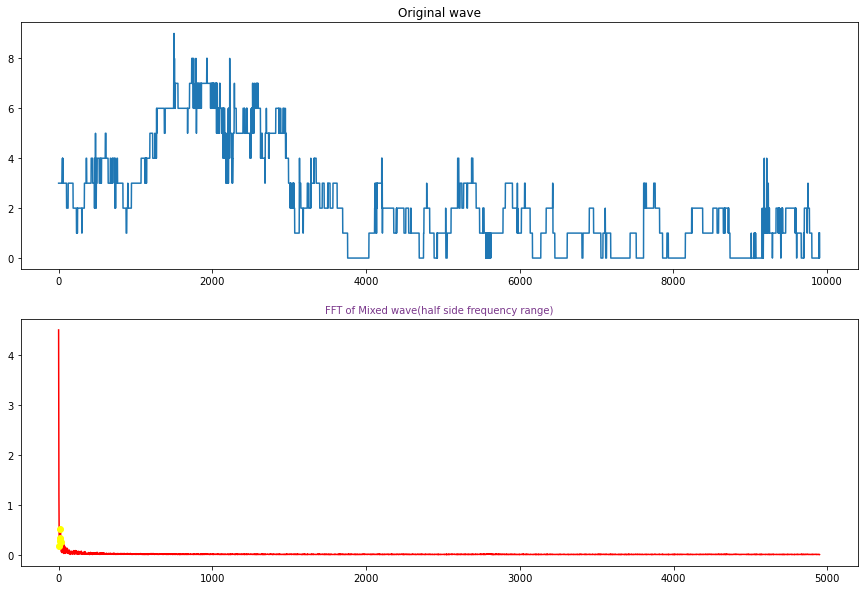

In [19]:
t11 = fftTransfer(ts3)

## Ts4右车道缓行（车多）

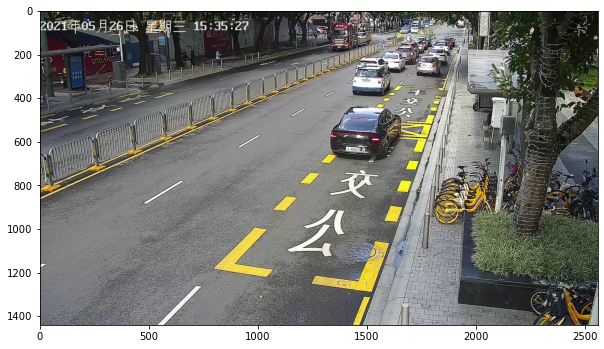

In [65]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con2.1.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [9]:
ts4 = getTrafficFlow("/home/adminroot/Desktop/Detection/videos/test5.5.mp4.mp4", rcfg='/home/adminroot/Desktop/Detection/confs/con2.conf')

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [17]:
ts2csv(ts4, 20)

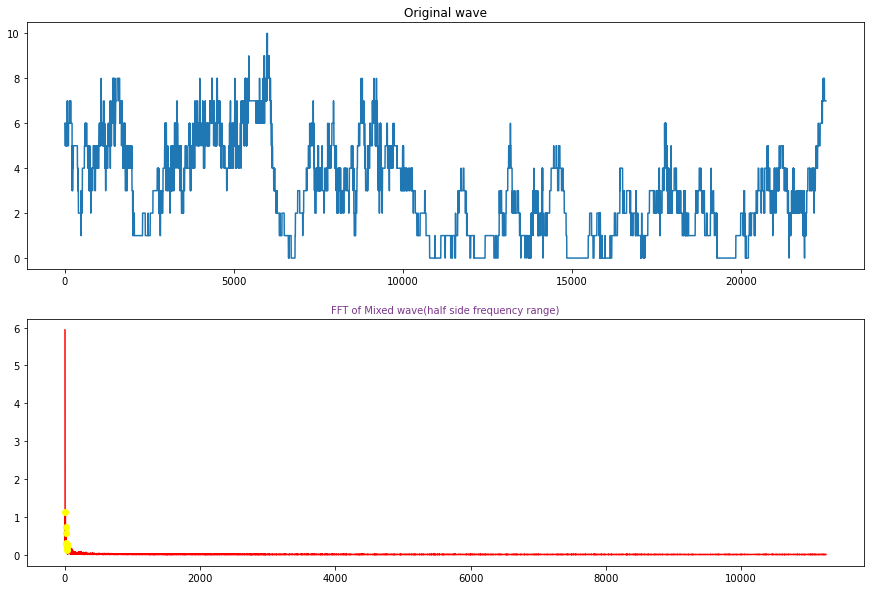

In [23]:
t20 = fftTransfer(ts4)

## Ts5右车道缓行（车较多）

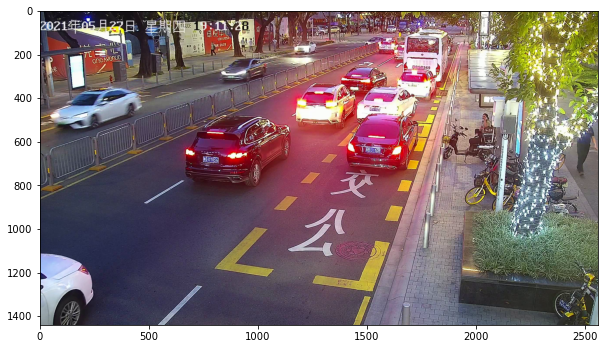

In [67]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con2.2.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [20]:
ts5 = getTrafficFlow("/home/adminroot/Desktop/Detection/videos/test5.6.mp4.mp4")

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [21]:
ts2csv(ts5, 21)

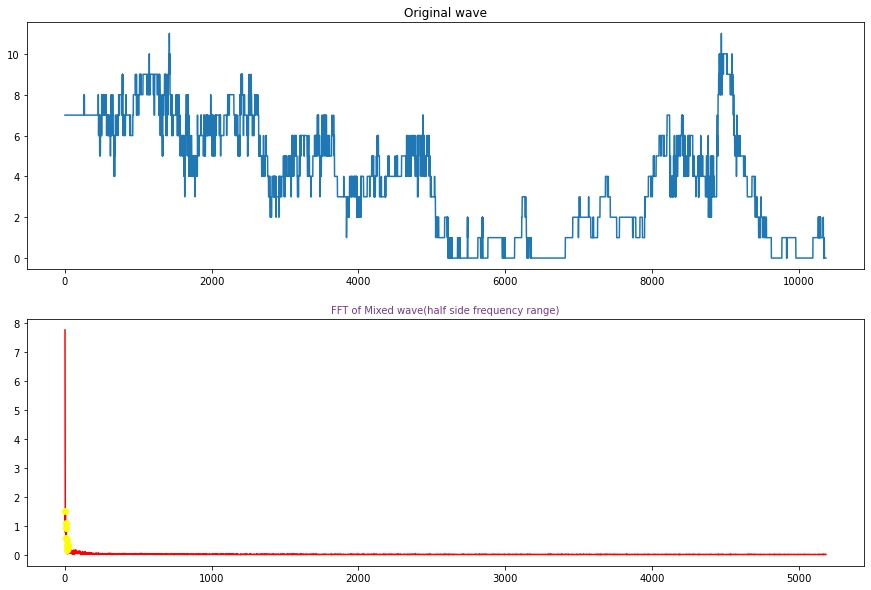

In [24]:
t21 = fftTransfer(ts5)

## Ts6支干道，车多不堵

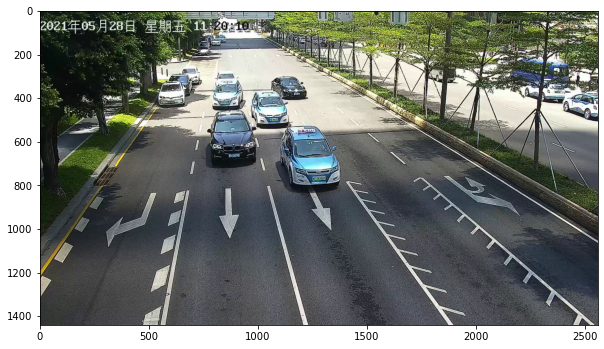

In [68]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con6.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [44]:
ts6 = getTrafficFlow("/home/adminroot/Desktop/Detection/test84.0.mp4.mp4", rcfg="/home/adminroot/Desktop/Detection/confs/con7.conf")

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [45]:
ts2csv(ts6, 30)

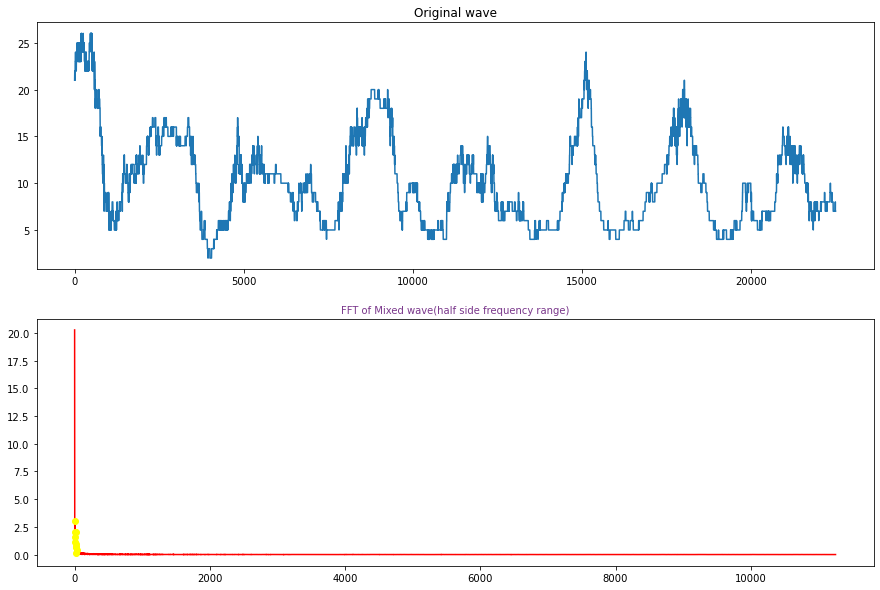

In [46]:
t30 = fftTransfer(ts6)

## Ts7支干道，堵车

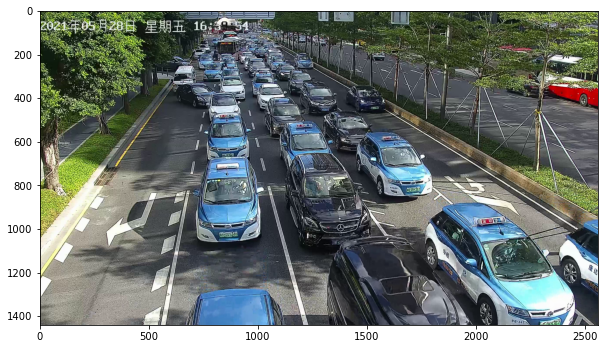

In [69]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con7.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [47]:
ts7 = getTrafficFlow("/home/adminroot/Desktop/Detection/test84.1.mp4.mp4", rcfg="/home/adminroot/Desktop/Detection/confs/con7.conf")

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [48]:
ts2csv(ts7, 31)

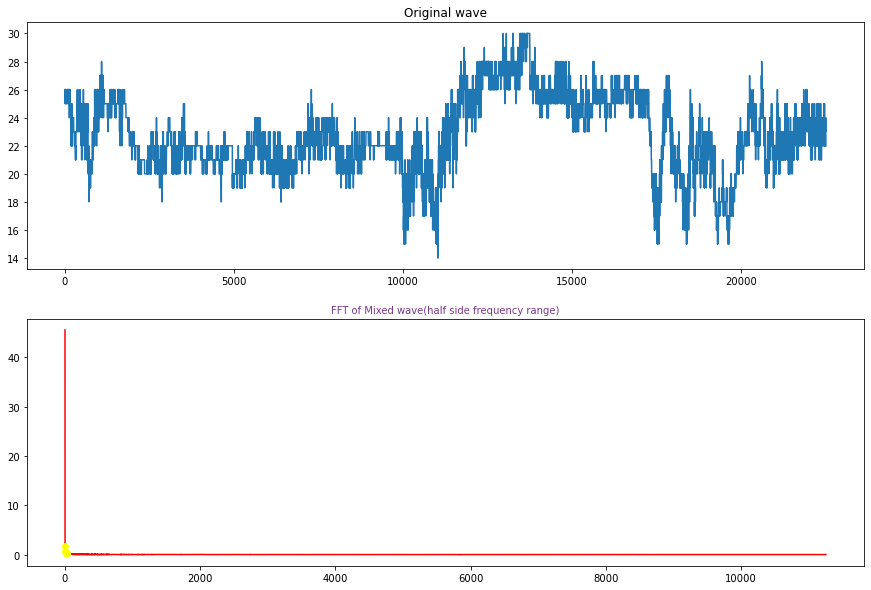

In [49]:
t31 = fftTransfer(ts7)

## Ts8支干道，堵车转不堵

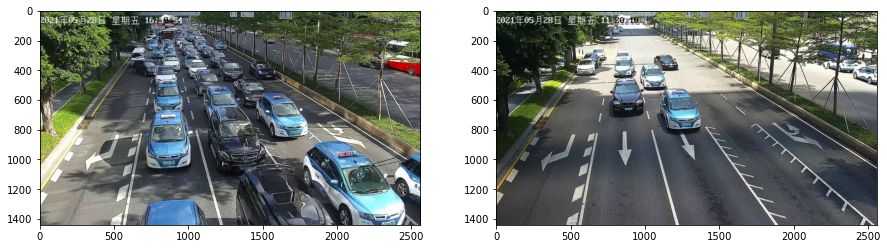

In [71]:
temp1 = plt.imread('/home/adminroot/Desktop/Detection/confs/con7.png')
temp2 = plt.imread('/home/adminroot/Desktop/Detection/confs/con6.png')

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(temp1)
plt.subplot(222)
plt.imshow(temp2)

In [50]:
ts8 = getTrafficFlow("/home/adminroot/Desktop/Detection/test84.2.mp4.mp4", rcfg="/home/adminroot/Desktop/Detection/confs/con7.conf")

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


In [51]:
ts2csv(ts8, 32)

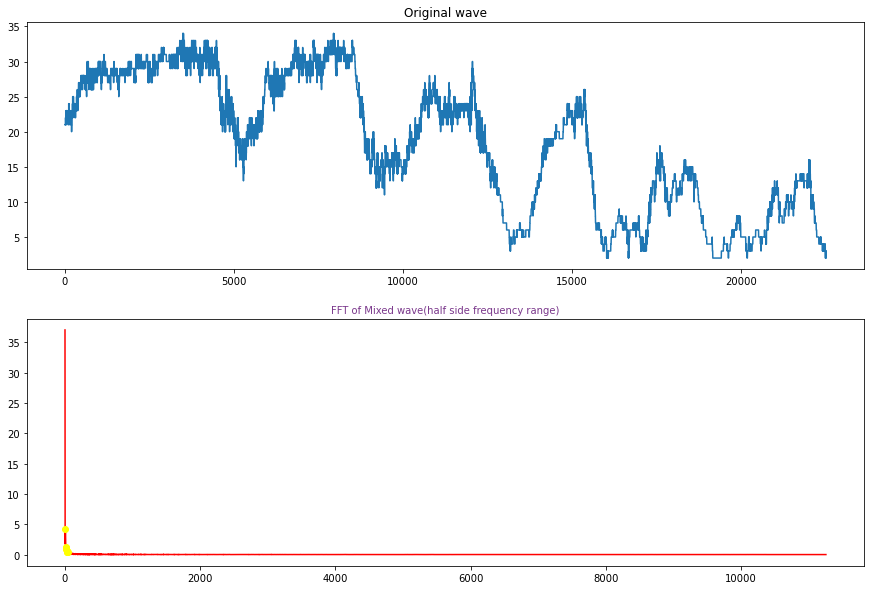

In [52]:
t32 = fftTransfer(ts8)

# Test

In [61]:
yf = abs(fft(detection))  # 取绝对值
yfnormlize = yf / len(detection)  # 归一化处理
yfhalf = yfnormlize[range(int(len(detection) / 2))]  # 由于对称性，只取一半区间
yfhalf = yfhalf * 2   # y 归一化

In [65]:

xf = np.arange(len(detection))  # 频率
xhalf = xf[range(int(len(detection) / 2))]  # 取一半区间


Text(0.5, 1.0, 'FFT of Mixed wave(half side frequency range)')

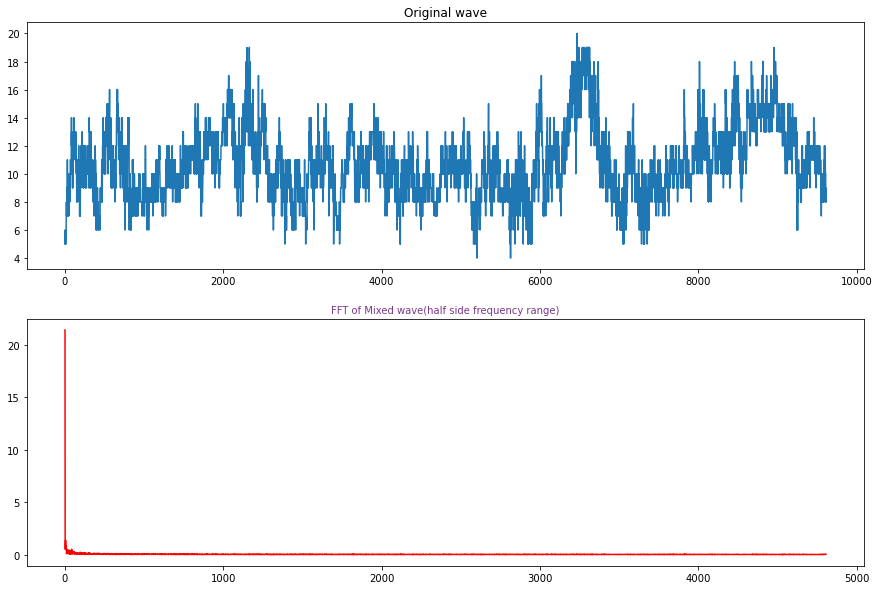

In [73]:
plt.figure(figsize=(15,10))
plt.subplot(211)
x = np.arange(len(detection))  # x轴
plt.plot(x, detection)
plt.title('Original wave')
plt.subplot(212)
plt.plot(xhalf, yfhalf, 'r')
plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')

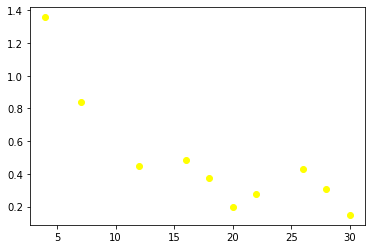

xorder =  [   0    1   12 ... 1248 1500 1580]
<class 'numpy.ndarray'>


In [77]:
n=10
fwbest = yfhalf[signal.argrelextrema(yfhalf, np.greater)]
xwbest = signal.argrelextrema(yfhalf, np.greater)
plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
plt.show(block=False)
plt.show()

xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
print('xorder = ', xorder)
print(type(xorder))

In [2]:

# cfg = './utils/yolo/yoloconfig.ini'
# yolo = YOLODetector(cfg)

# detection = []

# for i, img in enumerate(get_frames("/home/adminroot/Desktop/Detection/test2.mp4")):

#     res = yolo.Infer(img, img_name=str(i)+"res.jpg", save_path='./imgs')

#     count = 0 
#     for obj in res:

#         if obj[5] == 1 or 2:
#             count += 1

#     detection.append(count)